In [11]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import preprocessing
import time

### Импортируем набор данных MNIST

In [12]:
from keras.datasets import mnist, fashion_mnist

In [13]:
(mnist_X, mnist_y), (mnist_test_X, mnist_test_y) = mnist.load_data()
(fashion_X, fashion_y), (fashion_test_X, fashion_test_y) = fashion_mnist.load_data()

print('digits X_train: ' + str(mnist_X.shape))
print('digits Y_train: ' + str(mnist_y.shape))
print('digits X_test:  '  + str(mnist_test_X.shape))
print('digits Y_test:  '  + str(mnist_test_y.shape))
print()
print('fashion X_train: ' + str(fashion_X.shape))
print('fashion Y_train: ' + str(fashion_y.shape))
print('fashion X_test:  '  + str(fashion_test_X.shape))
print('fashion Y_test:  '  + str(fashion_test_y.shape))

digits X_train: (60000, 28, 28)
digits Y_train: (60000,)
digits X_test:  (10000, 28, 28)
digits Y_test:  (10000,)

fashion X_train: (60000, 28, 28)
fashion Y_train: (60000,)
fashion X_test:  (10000, 28, 28)
fashion Y_test:  (10000,)


### Нормализуем данные

In [14]:
scaler = preprocessing.MinMaxScaler()

scaler.fit_transform(mnist_X.reshape(60000, 784)).reshape(60000, 28, 28)
scaler.fit_transform(mnist_test_X.reshape(10000, 784)).reshape(10000, 28, 28)

scaler.fit_transform(fashion_X.reshape(60000, 784)).reshape(60000, 28, 28)
scaler.fit_transform(fashion_test_X.reshape(10000, 784)).reshape(10000, 28, 28);

### Выведем данные

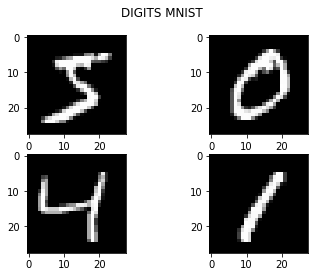

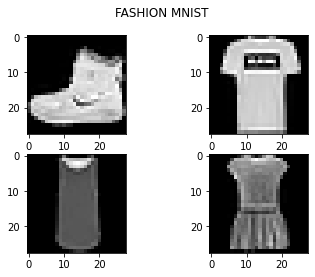

In [15]:
fig, ax = plt.subplots(2, 2)
fig.suptitle("DIGITS MNIST")
ax[0, 0].imshow(mnist_X[0] / 255, cmap='gray')
ax[0, 1].imshow(mnist_X[1], cmap='gray')
ax[1, 0].imshow(mnist_X[2], cmap='gray')
ax[1, 1].imshow(mnist_X[3], cmap='gray')
plt.show()

fig, ax = plt.subplots(2, 2)
fig.suptitle("FASHION MNIST")
ax[0, 0].imshow(fashion_X[0] / 255, cmap='gray')
ax[0, 1].imshow(fashion_X[1], cmap='gray')
ax[1, 0].imshow(fashion_X[2], cmap='gray')
ax[1, 1].imshow(fashion_X[3], cmap='gray')
plt.show()

### Используем t-SNE

##### DIGITS MNIST

c:\Users\naumo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\naumo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\naumo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\naumo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\naumo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in T

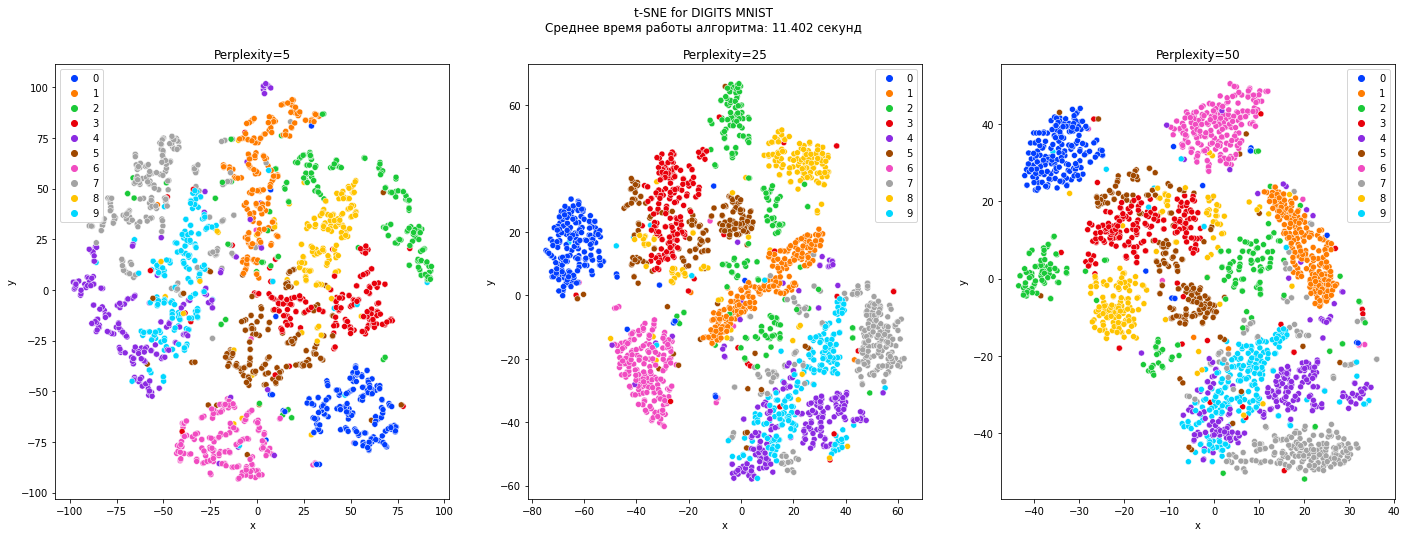

In [16]:
number_of_data = 2000
reshaped_train_X = mnist_X.reshape(60000, 784)
reshaped_test_X = mnist_test_X.reshape(10000, 784)
px = (5, 25, 50)

elapsed_time = 0

T = dict()
for i in range(len(px)):
    t1 = time.time()
    T[px[i]] = TSNE(n_components=2, perplexity=px[i], random_state=123).fit_transform(reshaped_train_X[:number_of_data])
    elapsed_time += time.time() - t1
elapsed_time /= len(px)
DATA = []

fsize = 8
fig, ax = plt.subplots(1, 3, figsize=(3*fsize, fsize))
fig.suptitle("t-SNE for DIGITS MNIST\nСреднее время работы алгоритма: "+str(round(elapsed_time, 3)) + " секунд")
for i in range(len(px)):
    DATA.append(pd.DataFrame(T[px[i]], columns=['x', 'y']))
    sns.scatterplot(ax=ax[i], x='x', y='y', hue=mnist_y[:number_of_data], data=DATA[i], palette='bright')
    ax[i].set_title("Perplexity="+str(px[i]))
plt.show()

##### FASHION MNIST

c:\Users\naumo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\naumo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\naumo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Users\naumo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(
c:\Users\naumo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in T

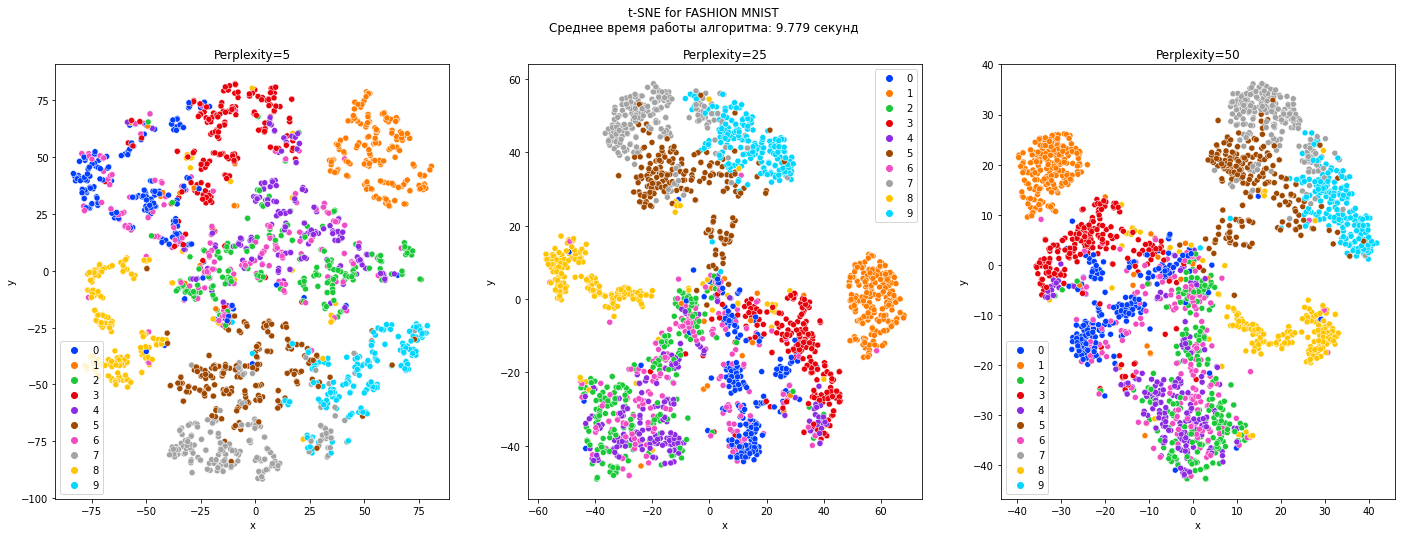

In [17]:
number_of_data = 2000
reshaped_train_X = fashion_X.reshape(60000, 784)
reshaped_test_X = fashion_test_X.reshape(10000, 784)
px = (5, 25, 50)

elapsed_time = 0

T = dict()
for i in range(len(px)):
    t1 = time.time()
    T[px[i]] = TSNE(n_components=2, perplexity=px[i], random_state=123).fit_transform(reshaped_train_X[:number_of_data])
    elapsed_time += time.time() - t1
elapsed_time /= len(px)
DATA = []

fsize = 8
fig, ax = plt.subplots(1, 3, figsize=(3*fsize, fsize))
fig.suptitle("t-SNE for FASHION MNIST\nСреднее время работы алгоритма: "+str(round(elapsed_time, 3)) + " секунд")
for i in range(len(px)):
    DATA.append(pd.DataFrame(T[px[i]], columns=['x', 'y']))
    sns.scatterplot(ax=ax[i], x='x', y='y', hue=fashion_y[:number_of_data], data=DATA[i], palette='bright')
    ax[i].set_title("Perplexity="+str(px[i]))
plt.show()

### Используем UMAP

In [18]:
import umap

##### DIGITS MNIST

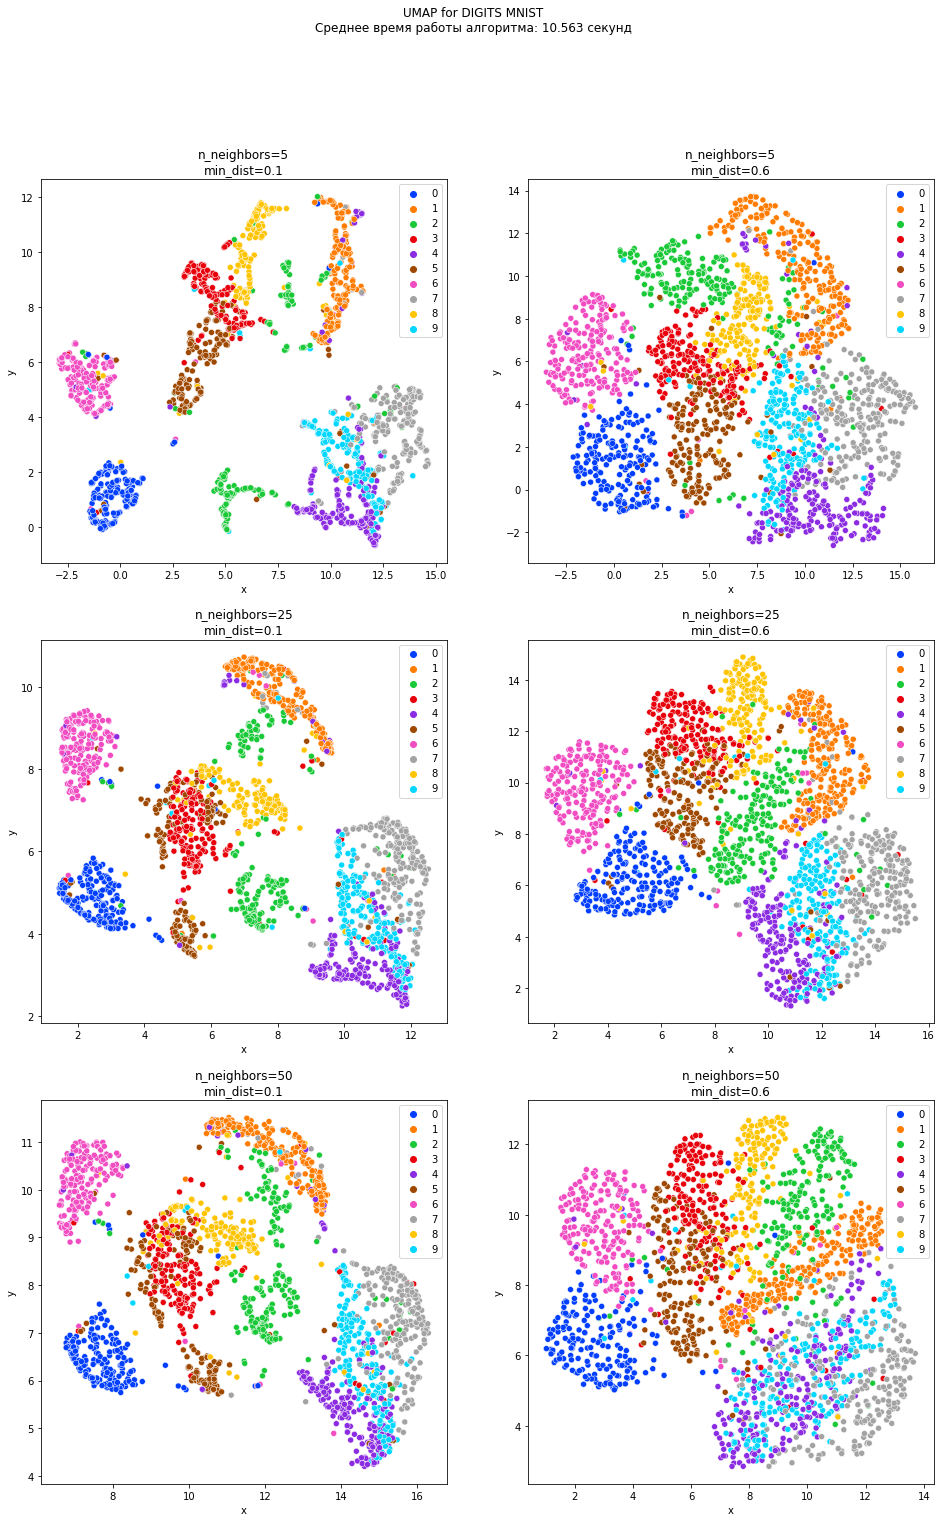

In [19]:
number_of_data = 2000
reshaped_train_X = mnist_X.reshape(60000, 784)
reshaped_test_X = mnist_test_X.reshape(10000, 784)
n_n = (5, 25, 50) #n_neighbors
m_d = (0.1, 0.6) #min_dist

elapsed_time = 0

um = dict()
for i in range(len(n_n)):
    for j in range(len(m_d)):
        t1 = time.time()
        um[(n_n[i], m_d[j])]=(umap.UMAP(n_neighbors=n_n[i], min_dist=m_d[j], random_state=123).fit_transform(reshaped_train_X[:number_of_data]))
        elapsed_time += time.time() - t1
elapsed_time /= len(n_n)*len(m_d)
DATA = []

fsize = 8
fig, ax = plt.subplots(3, 2, figsize=(2*fsize, 3*fsize))
fig.suptitle("UMAP for DIGITS MNIST\nСреднее время работы алгоритма: "+str(round(elapsed_time, 3)) + " секунд")
for i in range(len(n_n)):
    DATA.append([])
    for j in range(len(m_d)):
        DATA[-1].append(pd.DataFrame(um[(n_n[i], m_d[j])], columns=['x', 'y']))
        sns.scatterplot(ax=ax[i][j], x='x', y='y', hue=mnist_y[:number_of_data], data=DATA[i][j], palette='bright')
        ax[i][j].set_title("n_neighbors="+str(n_n[i])+"\nmin_dist="+str(m_d[j]))
plt.show()

##### FASHION MNIST

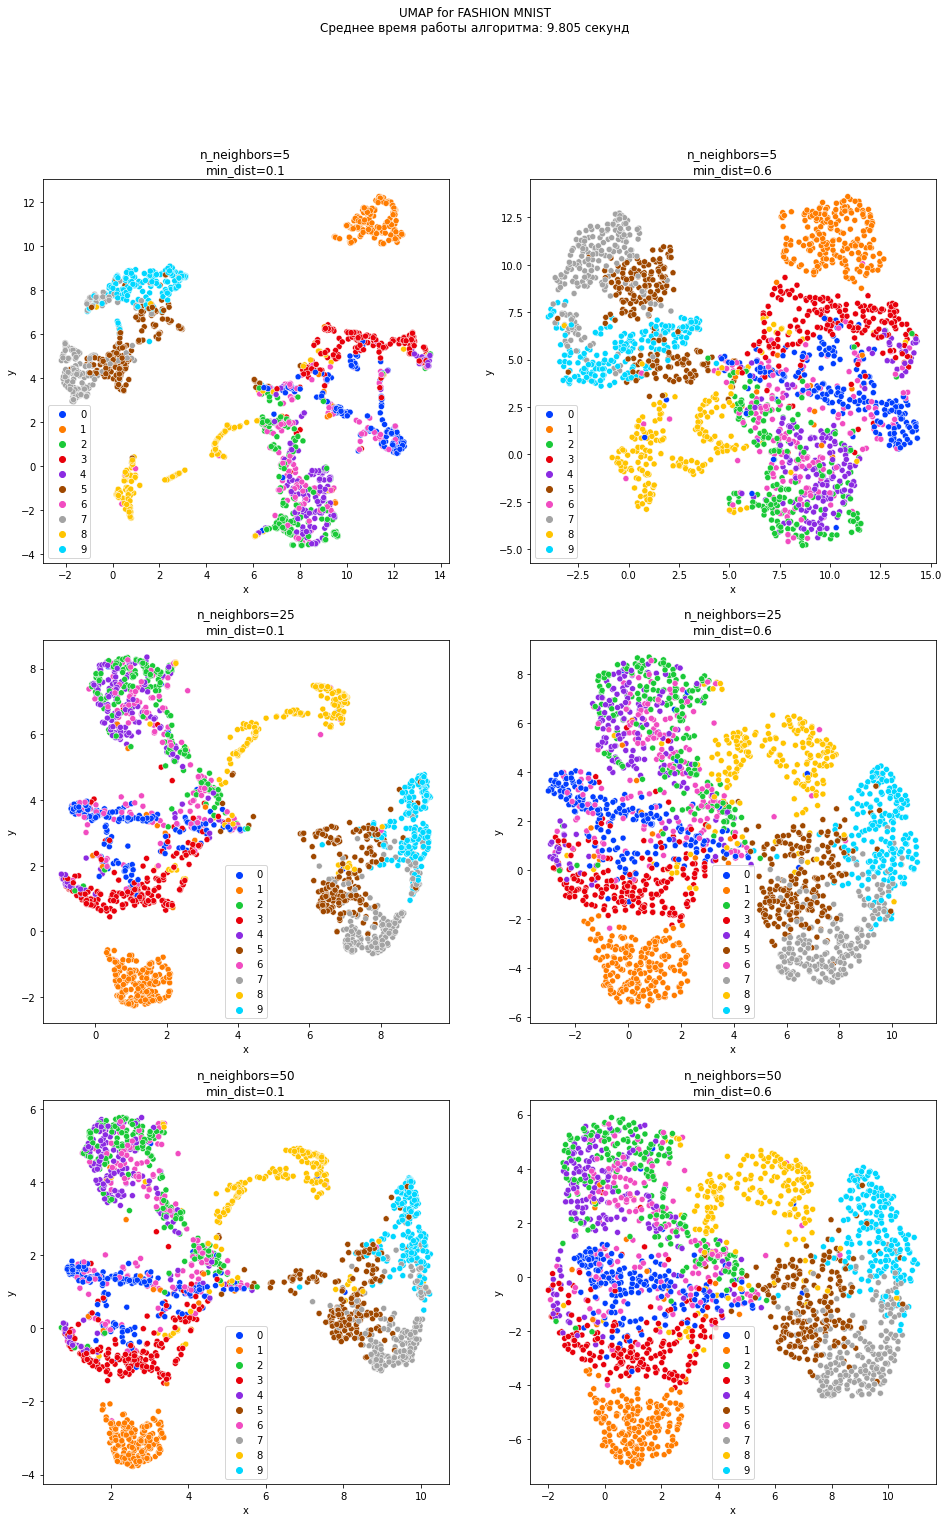

In [20]:
number_of_data = 2000
reshaped_train_X = fashion_X.reshape(60000, 784)
reshaped_test_X = fashion_test_X.reshape(10000, 784)
n_n = (5, 25, 50) #n_neighbors
m_d = (0.1, 0.6) #min_dist

elapsed_time = 0

um = dict()
for i in range(len(n_n)):
    for j in range(len(m_d)):
        t1 = time.time()
        um[(n_n[i], m_d[j])]=(umap.UMAP(n_neighbors=n_n[i], min_dist=m_d[j], random_state=123).fit_transform(reshaped_train_X[:number_of_data]))
        elapsed_time += time.time() - t1
elapsed_time /= len(n_n) * len(m_d)
DATA = []

fsize = 8
fig, ax = plt.subplots(3, 2, figsize=(2*fsize, 3*fsize))
fig.suptitle("UMAP for FASHION MNIST\nСреднее время работы алгоритма: "+str(round(elapsed_time, 3)) + " секунд")
for i in range(len(n_n)):
    DATA.append([])
    for j in range(len(m_d)):
        DATA[-1].append(pd.DataFrame(um[(n_n[i], m_d[j])], columns=['x', 'y']))
        sns.scatterplot(ax=ax[i][j], x='x', y='y', hue=fashion_y[:number_of_data], data=DATA[i][j], palette='bright')
        ax[i][j].set_title("n_neighbors="+str(n_n[i])+"\nmin_dist="+str(m_d[j]))
plt.show()